**This notebook is an exercise in the [Pandas](https://www.kaggle.com/learn/pandas) course.  You can reference the tutorial at [this link](https://www.kaggle.com/residentmario/summary-functions-and-maps).**

---


# Introduction

Now you are ready to get a deeper understanding of your data.

Run the following cell to load your data and some utility functions (including code to check your answers).

In [1]:
import pandas as pd
pd.set_option("display.max_rows", 5)
reviews = pd.read_csv("./winemag-data-130k-v2.csv", index_col=0)
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# Exercises

## 1.

What is the median of the `points` column in the `reviews` DataFrame?

In [2]:
median_points = reviews.points.median()

median_points

88.0

## 2. 
What countries are represented in the dataset? (Your answer should not include any duplicates.)

In [3]:
countries = reviews.country.unique()

countries

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

## 3.
How often does each country appear in the dataset? Create a Series `reviews_per_country` mapping countries to the count of reviews of wines from that country.

In [4]:
reviews_per_country = reviews.country.value_counts()

reviews_per_country

US        54504
France    22093
          ...  
China         1
Egypt         1
Name: country, Length: 43, dtype: int64

## 4.
Create variable `centered_price` containing a version of the `price` column with the mean price subtracted.

(Note: this 'centering' transformation is a common preprocessing step before applying various machine learning algorithms.) 

In [5]:
mean_price = reviews.price.mean()
centered_price = reviews.price - mean_price

centered_price

0               NaN
1        -20.363389
            ...    
129969    -3.363389
129970   -14.363389
Name: price, Length: 129971, dtype: float64

## 5.
I'm an economical wine buyer. Which wine is the "best bargain"? Create a variable `bargain_wine` with the title of the wine with the highest points-to-price ratio in the dataset.

In [6]:
# reviews.dropna()
reviews['ratio'] = reviews.points / reviews.price
bargain_wine = reviews.title[reviews.ratio.idxmax()]

bargain_wine

'Bandit NV Merlot (California)'

## 6.
There are only so many words you can use when describing a bottle of wine. Is a wine more likely to be "tropical" or "fruity"? Create a Series `descriptor_counts` counting how many times each of these two words appears in the `description` column in the dataset.

In [7]:
reviews['tropical'] = reviews['description'].str.find('tropical')
reviews['fruity'] = reviews['description'].str.find('fruity')

tropical_sum = reviews[(reviews['tropical'] > 0)]['tropical'].count()
fruity_sum = reviews[(reviews['fruity'] > 0)]['fruity'].count()
descriptor_counts = pd.Series([tropical_sum, fruity_sum], index=['tropical', 'fruity'])

descriptor_counts

tropical    3607
fruity      9090
dtype: int64

## 7.
We'd like to host these wine reviews on our website, but a rating system ranging from 80 to 100 points is too hard to understand - we'd like to translate them into simple star ratings. A score of 95 or higher counts as 3 stars, a score of at least 85 but less than 95 is 2 stars. Any other score is 1 star.

Also, the Canadian Vintners Association bought a lot of ads on the site, so any wines from Canada should automatically get 3 stars, regardless of points.

Create a series `star_ratings` with the number of stars corresponding to each review in the dataset.

In [8]:
def translate_to_stars(point):
    if point >= 95:
        return 3
    elif point >= 85:
        return 2
    return 1
# reviews['star_ratings'] = reviews['points'].apply(translate_to_stars)
star_ratings = reviews['points'].apply(translate_to_stars)

star_ratings

0         2
1         2
         ..
129969    2
129970    2
Name: points, Length: 129971, dtype: int64

## Some plots

(129971, 16)


country
Germany       2165
Australia     2329
             ...  
France       22093
US           54504
Name: country, Length: 10, dtype: int64

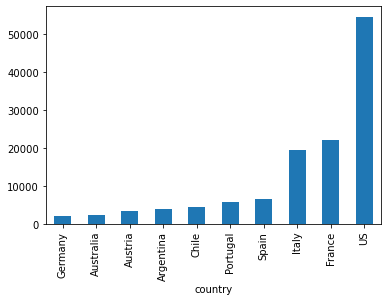

In [26]:
import matplotlib.pyplot as plt

print(reviews.shape)

by_country = reviews.groupby('country')['country'] \
    .count() \
    .sort_values(ascending=False)[0:10] \
    .sort_values(ascending=True);
by_country.plot.bar(by_country)
by_country